##### 調整內容：
##### -在建立和訓練model中同時以幾個相同的model但有不同的batchsize和epochs，發現小的batch size在短時間內能快速提高正確率，但收斂程度大，而大的batch size較穩定但需要較多時間來達到相同的正確率
##### -以plot呈現資料在不同訓練條件的model下accuracy的差異

### 1讀入套件和資料

In [0]:
%tensorflow_version 2.x

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2整理數據內容
##### (1) 把原本有RGB 3個channel 整理成一個，並且範圍0~1

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
x_test.shape

(10000, 28, 28)

In [39]:
print('training data max: ' + str(x_train.max()) + '\ntraining data min: ' + str(x_train.min()))
print('training result max: ' + str(y_train.max()) + '\ntraining result min: ' + str(y_train.min()))

training data max: 255
training data min: 0
training result max: 9
training result min: 0


In [0]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

##### (2) one-hot encoding

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##### (3) 欣賞幾個

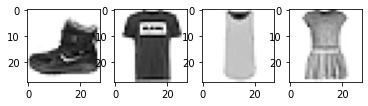

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(4):
    plt.subplot(141+i)
    plt.imshow(x_train[i].reshape(28,28), cmap='Greys')  

In [44]:
y_train[8998]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 3建立CNN
##### (1) 讀入套件

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

##### (2) 一層一層建立fliter

In [0]:
modela = Sequential()
modela.add(Conv2D(16, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [0]:
# 輸出16個28x28的矩陣，事實上是(28, 28, 16)，pool之後應該要變(14, 14, 16) 14x14有16個
modela.add(MaxPooling2D(pool_size=(2,2)))
modela.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# 要輸出(14, 14, 32) 14x14有32張記分板
modela.add(MaxPooling2D(pool_size=(2, 2)))
# 再pool--> output(7, 7, 32)
modela.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modela.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
# 轉成一維
modela.add(Flatten())
modela.add(Dense(54, activation='relu'))
# 最後一層輸出10個數字，加起來是1(softmax)
modela.add(Dense(10, activation='softmax'))

In [49]:
modela.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)              

##### (3) compile model

In [0]:
# learning rate 調整為0.05
modela.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

##### (4) 建立其他CNN，用來做比較

In [51]:
modelb = Sequential()
modelb.add(Conv2D(16, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
modelb.add(MaxPooling2D(pool_size=(2,2)))
modelb.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelb.add(MaxPooling2D(pool_size=(2, 2)))
modelb.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelb.add(MaxPooling2D(pool_size=(2, 2)))
modelb.add(Flatten())
modelb.add(Dense(54, activation='relu'))
modelb.add(Dense(10, activation='softmax'))
modelb.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)              

In [0]:
modelb.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [53]:
modelc = Sequential()
modelc.add(Conv2D(16, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
modelc.add(MaxPooling2D(pool_size=(2,2)))
modelc.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelc.add(MaxPooling2D(pool_size=(2, 2)))
modelc.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelc.add(MaxPooling2D(pool_size=(2, 2)))
modelc.add(Flatten())
modelc.add(Dense(54, activation='relu'))
modelc.add(Dense(10, activation='softmax'))
modelc.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)              

In [0]:
modelc.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

### 5訓練CNN

In [55]:
historya = modela.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
600/600 [==============================] - 43s 72ms/step - loss: 0.0897 - accuracy: 0.2296 - val_loss: 0.0895 - val_accuracy: 0.2692
Epoch 2/20
600/600 [==============================] - 43s 72ms/step - loss: 0.0892 - accuracy: 0.2964 - val_loss: 0.0889 - val_accuracy: 0.3311
Epoch 3/20
600/600 [==============================] - 42s 71ms/step - loss: 0.0883 - accuracy: 0.3791 - val_loss: 0.0874 - val_accuracy: 0.4105
Epoch 4/20
600/600 [==============================] - 43s 71ms/step - loss: 0.0844 - accuracy: 0.4086 - val_loss: 0.0777 - val_accuracy: 0.4171
Epoch 5/20
600/600 [==============================] - 43s 71ms/step - loss: 0.0644 - accuracy: 0.5404 - val_loss: 0.0520 - val_accuracy: 0.6339
Epoch 6/20
600/600 [==============================] - 42s 71ms/step - loss: 0.0446 - accuracy: 0.6810 - val_loss: 0.0405 - val_accuracy: 0.7099
Epoch 7/20
600/600 [==============================] - 43s 71ms/step - loss: 0.0387 - accuracy: 0.7247 - val_loss: 0.0389 - val_accuracy:

In [56]:
historyb = modelb.fit(x_train, y_train, batch_size=500, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
120/120 [==============================] - 38s 317ms/step - loss: 0.0899 - accuracy: 0.1027 - val_loss: 0.0898 - val_accuracy: 0.1105
Epoch 2/20
120/120 [==============================] - 38s 318ms/step - loss: 0.0897 - accuracy: 0.1241 - val_loss: 0.0897 - val_accuracy: 0.1375
Epoch 3/20
120/120 [==============================] - 39s 325ms/step - loss: 0.0896 - accuracy: 0.1523 - val_loss: 0.0895 - val_accuracy: 0.1630
Epoch 4/20
120/120 [==============================] - 38s 318ms/step - loss: 0.0894 - accuracy: 0.1804 - val_loss: 0.0894 - val_accuracy: 0.1893
Epoch 5/20
120/120 [==============================] - 38s 317ms/step - loss: 0.0893 - accuracy: 0.2011 - val_loss: 0.0892 - val_accuracy: 0.2048
Epoch 6/20
120/120 [==============================] - 38s 318ms/step - loss: 0.0891 - accuracy: 0.2188 - val_loss: 0.0890 - val_accuracy: 0.2261
Epoch 7/20
120/120 [==============================] - 38s 318ms/step - loss: 0.0889 - accuracy: 0.2522 - val_loss: 0.0888 - val_ac

In [57]:
historyc = modelc.fit(x_train, y_train, batch_size=20, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
3000/3000 [==============================] - 56s 19ms/step - loss: 0.0782 - accuracy: 0.3723 - val_loss: 0.0455 - val_accuracy: 0.6628
Epoch 2/20
3000/3000 [==============================] - 56s 19ms/step - loss: 0.0374 - accuracy: 0.7324 - val_loss: 0.0373 - val_accuracy: 0.7313
Epoch 3/20
3000/3000 [==============================] - 56s 19ms/step - loss: 0.0305 - accuracy: 0.7866 - val_loss: 0.0294 - val_accuracy: 0.7991
Epoch 4/20
3000/3000 [==============================] - 59s 20ms/step - loss: 0.0273 - accuracy: 0.8102 - val_loss: 0.0277 - val_accuracy: 0.8053
Epoch 5/20
3000/3000 [==============================] - 56s 19ms/step - loss: 0.0249 - accuracy: 0.8280 - val_loss: 0.0245 - val_accuracy: 0.8318
Epoch 6/20
3000/3000 [==============================] - 56s 19ms/step - loss: 0.0230 - accuracy: 0.8410 - val_loss: 0.0228 - val_accuracy: 0.8421
Epoch 7/20
3000/3000 [==============================] - 56s 19ms/step - loss: 0.0216 - accuracy: 0.8519 - val_loss: 0.0234 -

### 6看看result

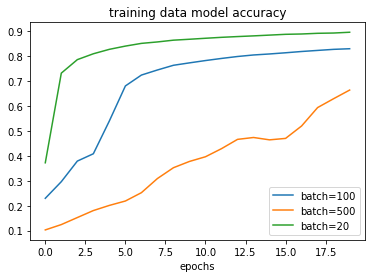

In [65]:
plt.plot(historya.history['accuracy'])
plt.plot(historyb.history['accuracy'])
plt.plot(historyc.history['accuracy'])
plt.title('training data model accuracy')
plt.xlabel('epochs')
plt.legend(['batch=100', 'batch=500', 'batch=20'], loc='lower right')
plt.show()

##### 大的batch size相較其他在計算上比較穩定，訓練曲線比較平滑，大的相較小的batch size不會那麼早開始收斂。
##### 但是卻需要花760秒左右只達到0.66的正確率，而20和100的batch size只需80和240秒即可獲得一樣成果。

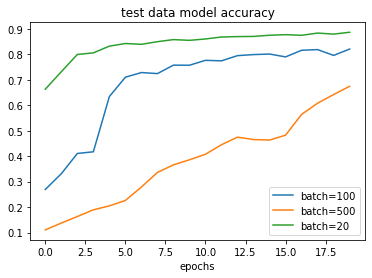

In [66]:
plt.plot(historya.history['val_accuracy'])
plt.plot(historyb.history['val_accuracy'])
plt.plot(historyc.history['val_accuracy'])
plt.title('test data model accuracy')
plt.xlabel('epochs')
plt.legend(['batch=100', 'batch=500', 'batch=20'], loc='lower right')
plt.show()

In [60]:
# 看測試資料有沒有準
scorea = modela.evaluate(x_test, y_test)
scoreb = modelb.evaluate(x_test, y_test)
scorec = modelc.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0171 - accuracy: 0.8863


### 7predict
##### 以accuracy最高的model進行

In [0]:
result = modelc.predict_classes(x_test)
def my_predict(n):
  print('CNN predicts:', class_names[result[n]])
  X = x_test[n].reshape(28, 28)
  plt.imshow(X, cmap='Greys')

In [64]:
from ipywidgets import interact_manual
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict>